In [3]:
import numpy as np 
import scipy.io as sio
import xarray as xr
import matplotlib.pyplot as plt
import netCDF4 as nc
import glob
import os

# Details 

Information about the data provided by Catherine. 

Questions for Catherine: 
1. How many years of data is included in this file you gave me? 
        SH WARM 2008-2012


Sample file = '/localdrive/drive10/mcms_tracker/RUNDIR/tmp_data/Cyclonecenteredcompos_MODIScldMERRA2PWomega500_SHwarm20082012.ncdf'


<xarray.Dataset>
Dimensions:     (nbradist: 25, nbtheta: 25)
Dimensions without coordinates: nbradist, nbtheta
Data variables:
    angle       (nbtheta) float32 ...
    rdist       (nbradist) float32 ...
    modiscld    (nbradist, nbtheta) float32 ...
    merrapw     (nbradist, nbtheta) float32 ...
    merraomega  (nbradist, nbtheta) float32 ...

In [4]:
# Folder in which catherine has her data
folder = '/localdrive/drive10/mcms_tracker/RUNDIR/tmp_data'
catherine_file = '/localdrive/drive10/mcms_tracker/RUNDIR/tmp_data/Cyclonecenteredcompos_MODIScldMERRA2PWomega500_SHwarm20082012.ncdf'

In [6]:
ds = xr.open_dataset(catherine_file)

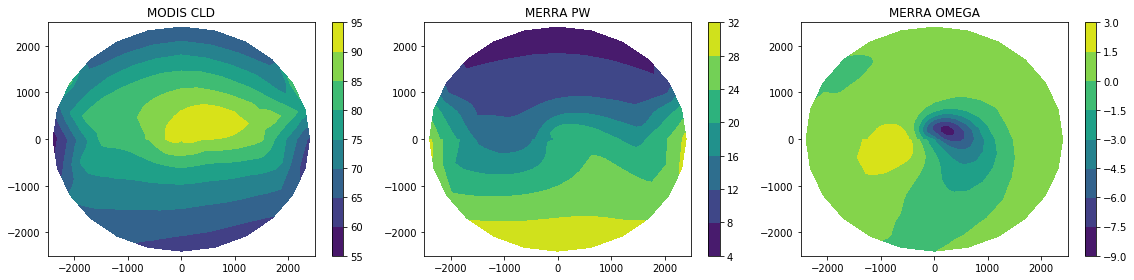

In [7]:
# converting from polar co-ordinates to rectangular co-ordinates
ang = ds.angle.values
dist = ds.rdist.values

ang_grid, dist_grid = np.meshgrid(ang, dist)
x = dist_grid * np.cos(ang_grid)
y = dist_grid * np.sin(ang_grid)

modis_cld = ds.modiscld.values
merra_pw = ds.merrapw.values
merra_omega = ds.merraomega.values

# plotting the figure by converting it to x,y cdts
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
plt.contourf(x, y, modis_cld)
plt.colorbar()
plt.xlim(-2500, 2500)
plt.ylim(-2500, 2500)
plt.title('MODIS CLD')

plt.subplot(1,3,2)
plt.contourf(x, y, merra_pw)
plt.colorbar()
plt.xlim(-2500, 2500)
plt.ylim(-2500, 2500)
plt.title('MERRA PW')

plt.subplot(1,3,3)
plt.contourf(x, y, merra_omega)
plt.colorbar()
plt.xlim(-2500, 2500)
plt.ylim(-2500, 2500)
plt.title('MERRA OMEGA')

plt.tight_layout()
plt.show()

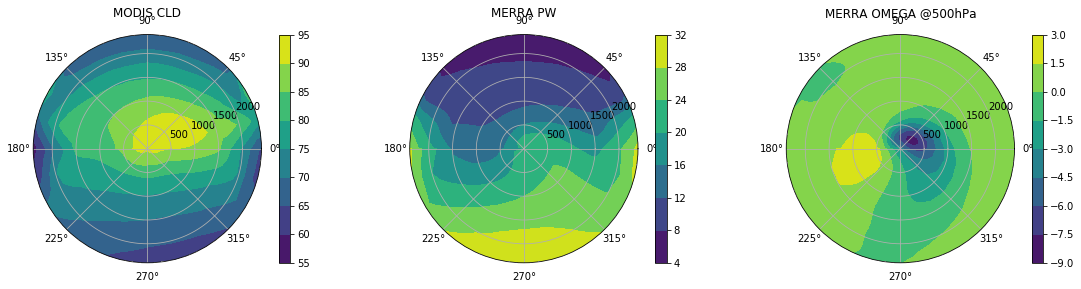

In [9]:
# plotting the figure using angle and distance
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw={'projection' :'polar'}, figsize=(16,4))

cnf1 = ax1.contourf(ds.angle.values, ds.rdist.values, ds.modiscld.values); ax1.set_title('MODIS CLD')
plt.colorbar(cnf1, ax=ax1)

cnf2 = ax2.contourf(ds.angle.values, ds.rdist.values, ds.merrapw.values); ax2.set_title('MERRA PW')
plt.colorbar(cnf2, ax=ax2)

cnf3 = ax3.contourf(ds.angle.values, ds.rdist.values, ds.merraomega.values); ax3.set_title('MERRA OMEGA @500hPa')
plt.colorbar(cnf3, ax=ax3)

plt.tight_layout()
plt.show()


# variables to save from Catherine Observations
1. ds.angle
2. ds.rdist
3. ds.modiscld
4. ds.merrapw
5. ds.merraomega500

# variables to save from ERA-Interim
1. PR - total precipitation
2. PRW - total column water vapor
3. UV10 - 10 meter wind speeds (U**10 + V**10)


In [10]:
print(ang.shape)

(25,)


In [11]:
modiscld = ds.modiscld.values
merrapw = ds.merrapw.values
merraomega = ds.merraomega.values * 100/3600

In [12]:
out_file = '/localdrive/drive10/jj/mdtf/inputdata/obs_data/etc_composites/modis_merra.nc'
out_ds = xr.Dataset(
    {
    'modis_cld': (['x', 'y'], modiscld), 
    'merra_pw': (['x', 'y'], merrapw), 
    'merra_omega': (['x', 'y'], merraomega), 
    },
    coords={
        'X': (['x', 'y'], x), 
        'Y': (['x', 'y'], y), 
        'angle': (['x'], ang),
        'dist': (['x'], dist)
    }
)
out_ds.to_netcdf(out_file)

In [13]:
print(out_ds)

<xarray.Dataset>
Dimensions:      (x: 25, y: 25)
Coordinates:
    X            (x, y) float32 -0.0 -0.0 -0.0 ... -2078.4612 -2318.2222 -2400.0
    Y            (x, y) float32 0.0 -0.0 -0.0 ... 621.1654 -0.00020981467
    angle        (x) float32 -3.1415927 -2.8797934 ... 2.8797934 3.1415927
    dist         (x) float32 0.0 100.0 200.0 300.0 ... 2200.0 2300.0 2400.0
Dimensions without coordinates: x, y
Data variables:
    modis_cld    (x, y) float32 92.146996 91.909424 ... 67.6577 56.993305
    merra_pw     (x, y) float32 19.11767 18.964869 ... 21.494896 27.856266
    merra_omega  (x, y) float32 -0.0903799 -0.08427941 ... 0.008422734
